<a href="https://colab.research.google.com/github/quastarK/Tensorflow_colab/blob/main/3%EA%B0%95_%EC%A6%89%EC%8B%9C_%EC%8B%A4%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
x = [[2.]]

In [ ]:
m = tf.matmul(x, x)

In [ ]:
m

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [ ]:
print("hello, {}".format(m))

hello, [[4.]]


In [ ]:
a = tf.constant([[1,2], [3,4]])

In [ ]:
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
b = tf.add(a, 1)

In [ ]:
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [ ]:
print(a @ b)

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


In [ ]:
tf.multiply(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 2,  6],
       [12, 20]], dtype=int32)>

In [ ]:
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 13],
       [22, 29]], dtype=int32)>

In [ ]:
print(a.numpy())

[[1 2]
 [3 4]]


In [ ]:
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

In [ ]:
fizzbuzz(20)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz


In [ ]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w # w ** 2 미분하면 2w
grad = tape.gradient(loss, w)
print(grad) # 2.

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [ ]:
for x in zip([1,2,3], [4,5,6]):
  print(x)

(1, 4)
(2, 5)
(3, 6)


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1461 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9760
313/313 - 0s - loss: 0.0779 - accuracy: 0.9753


[0.07785734534263611, 0.9753000140190125]

In [ ]:
import tensorflow as tf

In [ ]:
# mnist 데이터 가져오기 및 포맷 맞추기
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

# 모델 생성
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])
for images,labels in dataset.take(1):
  print("로짓: ", mnist_model(images[0:1]).numpy())


optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)

    # 결과의 형태를 확인하기 위해서 단언문 추가
    tf.debugging.assert_equal(logits.shape, (32, 10))

    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))
  # W = W - alpha(learning rate) * gradients
  # dL/dW: gradients

def train():
  for epoch in range(3):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('에포크 {} 종료'.format(epoch))

train()



로짓:  [[ 0.10272741 -0.00775715  0.02847742 -0.03569447 -0.01011669 -0.083193
   0.03784788 -0.02906656 -0.01211514  0.03176637]]
에포크 0 종료
에포크 1 종료
에포크 2 종료


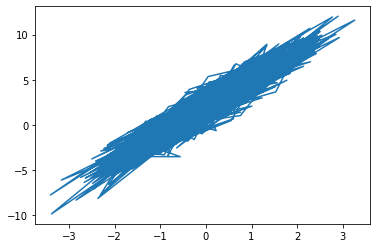

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_inputs, training_outputs)

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
  def call(self, inputs):
    return inputs * self.W + self.B

In [ ]:
# 약 3 * x + 2개의 점으로 구성된 실험 데이터
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

In [ ]:
# 최적화할 손실함수
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error)) # MSE, mean squared error

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

In [ ]:
# 정의:
# 1. 모델
# 2. 모델 파라미터에 대한 손실 함수의 미분
# 3. 미분에 기초한 변수 업데이트 전략
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("초기 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))

초기 손실: 68.948


In [ ]:
# 반복 훈련
for i in range(300):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("스텝 {:03d}에서 손실: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
    # print(grads[0].numpy(), grads[1].numpy(), model.W.numpy(), model.B.numpy())

print("최종 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

스텝 000에서 손실: 1.017
1.1829659e-05 8.4877014e-05 2.9948838 2.0168753
스텝 020에서 손실: 1.017
1.1846423e-05 5.6724995e-05 2.9948838 2.0168617
스텝 040에서 손실: 1.017
1.1857599e-05 3.7655234e-05 2.9948838 2.0168521
스텝 060에서 손실: 1.017
1.1857599e-05 2.7172267e-05 2.9948838 2.0168471
스텝 080에서 손실: 1.017
1.1875294e-05 1.7628074e-05 2.9948838 2.0168424
스텝 100에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 120에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 140에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 160에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 180에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 200에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 220에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 240에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 260에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.0168397
스텝 280에서 손실: 1.017
1.1892989e-05 1.1909753e-05 2.9948838 2.016